La empresa desea saber si tiene los recursos necesarios para soportar la demanda de los usuarios e
incrementar el numero de ticktes por día. En base a ello, diseñe y desarrolle un modelo y/o script que
permita realizar la simulación del proceso de pasar cuenca-aire con las siguientes especificaciones.

• La empresa tiene 3 carriles de revisión vehicular.

• Un solo carril es habilitado para carros de gran tonelaje, busetas, bus, camiones, solo el 15 %
de vehiculos que llegan son de este tipo.

• Cada 3 minutos llega un nuevo vehiculo a revision.

• Se sigue el siguiente proceso
1) Llega el vehiculo al centro, se estaciona (3-5 minutos), saca un turno (1-3 minutos) y pagan
la matricula (5 - 10 minutos).

2) Si esta vacio pasa directo a la revisión que tiene una media de 20 minutos con una
desviacion estandar de 10 minutos.

3) Solo el 60 % de vehiculos pasa sin ninguna notificación, el 40% salen realizan el arreglo (2
dias) y nuevamente realizan el proceso.

4) Despues de pasar la revisión, se les pega el sello (1 – 3 minutos) .

5) Finalmente, salen (5 – 10 minutos).

Generar un modelo de simulación por 30 dias y generar las siguientes graficas de resultados:

• Numero de vehiculos atendidos por dia, y por carril
• Porcentaje total de vehiculos aprobados y no aprobados en cuenca aire por dia.
• Tiempos del proceso de matriculación, por dia.

In [1]:
!pip install simpy

In [2]:

import simpy
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [61]:

tiempo={}
vehiculosAprobados=0
vehiculosDenegados=0

vehiculos =       [  'alto tonelaje',  'bajo tonelaje']
carril =       [  'carril 1',  'carril 2','carril 3']
tiempo_llegada =  [3,0,0]
#tiempos de demora en cada proceso para ello sumamos los tiempos en cada proceso
tiempo_proceso =   [[9,18],[20,20],[1,3],[5,10]]

In [66]:
class revisionTecnica(object):
    
    def __init__(self, environment, num_carriles):
        self.env=environment
        self.carril = simpy.Resource(environment, num_carriles)
        
    #metodo para simular la revision
    def revision(self, vehiculo, ncar, time1, time2):
        
        yield self.env.timeout(random.randint(time1,time2))
        print('revicion aceptada  {%d%%} vehiculo => %s ' % (random.randint(40,60), vehiculo))
            
def llegada_vehiculo(env, nombre, revision, ncar):
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    with revision.carril.request() as carril:
        yield carril
        yield env.timeout(tiempo_llegada[ncar]) 
        
        print('Entra vehiculo a revision: %s a la hora %.2f.' % (nombre, env.now))
        yield env.process(revision.revision(
            nombre, ncar, tiempo_proceso[ncar][0], tiempo_proceso[ncar][1])
        )
        print('Sale vehiculo de la revision  [%s]  a las %.2f.' % (nombre, env.now))
        k=env.now 
    if k in tiempo:
        tiempo[k]=tiempo[k]+1 
    else:
        tiempo[k]=1 

def ejecutar_simulacion(env, num_carril, intervalo):
    revision=revisionTecnica(env, num_carril)
    for i in range(6):
        ncar = random.randint(0, 3)
        env.process(llegada_vehiculo(env, f'{vehiculo[ncar]}-%d'%(i+1),revision, ncar))
    
    while True:
        yield env.timeout(random.randint(intervalo[0],intervalo[1]))
        i+=1
        ncar = random.randint(0, 2)
        env.process(llegada_vehiculo(env,f'{vehiculo[ncar]}-%d'%(i+1),revision, ncar))



revision tecnica vehicular
Llega vehiculo: carril 3-1 a la hora 0.00.
Llega vehiculo: carril 3-2 a la hora 0.00.
Llega vehiculo: carril 2-3 a la hora 0.00.
Llega vehiculo: carril 2-4 a la hora 0.00.
Llega vehiculo: carril 2-5 a la hora 0.00.
Llega vehiculo: carril 1-6 a la hora 0.00.
Entra vehiculo a revision: carril 3-1 a la hora 0.00.
Entra vehiculo a revision: carril 3-2 a la hora 0.00.
Entra vehiculo a revision: carril 2-3 a la hora 0.00.
revicion aceptada  {44%} vehiculo => carril 3-1 
Sale vehiculo de la revision  [carril 3-1]  a las 2.00.
Entra vehiculo a revision: carril 2-4 a la hora 2.00.
Llega vehiculo: carril 2-7 a la hora 3.00.
revicion aceptada  {55%} vehiculo => carril 3-2 
Sale vehiculo de la revision  [carril 3-2]  a las 3.00.
Entra vehiculo a revision: carril 2-5 a la hora 3.00.
Llega vehiculo: carril 1-8 a la hora 6.00.
Llega vehiculo: carril 1-9 a la hora 9.00.
Llega vehiculo: carril 2-10 a la hora 12.00.
Llega vehiculo: carril 1-11 a la hora 15.00.
Llega vehiculo: 

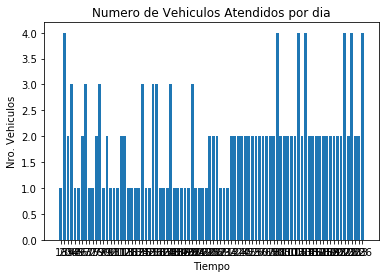

In [67]:

numero_carriles = 3
INTERVALO_LLEGADA = [3,3]

#tiempo de antecion en el dia es de 8 horas y mulplicamos por los 30 dias tomando en cuenta que trabajan de lunes a domingo
TIEMPO_SIMULACION = 240

print('revision tecnica vehicular')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, numero_carriles, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

print(tiempo)

etiqueta = list(tiempo.keys())
valores = list(tiempo.values())
plt.bar(range(len(tiempo)), valores, align="center", tick_label=etiqueta)
plt.title("Numero de Vehiculos Atendidos por dia")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.show()